### Twitter


In [1]:
import pandas as pd


In [2]:
twitter=pd.read_csv('Tweets.csv')

In [3]:
twitter.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [13]:
mood_count=twitter['airline_sentiment'].value_counts()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
airline_count=twitter['airline'].value_counts()
airline_count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

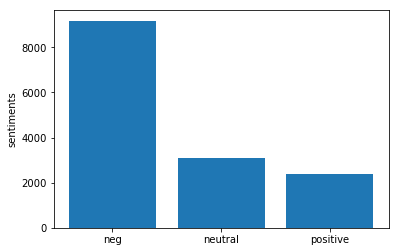

In [21]:
Index=[1,2,3]
plt.bar(Index,mood_count)
plt.xticks(Index,['neg','neutral','positive'])
plt.ylabel('sentiments')

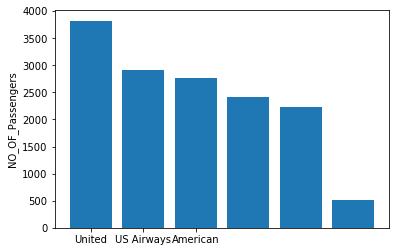

In [27]:
Index1=[1,2,3,4,5,6]
plt.bar(Index1,airline_count)
plt.xticks(Index,['United','US Airways','American','Southwest','Delta','Virgin America'])
plt.ylabel('NO_OF_Passengers')

In [29]:
# negetive reason for all airline and their count

In [44]:
all_reason=twitter['negativereason'].value_counts()
all_reason

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [45]:
xIndex=[i for i in range(10)]
xIndex

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Container object of 10 artists>

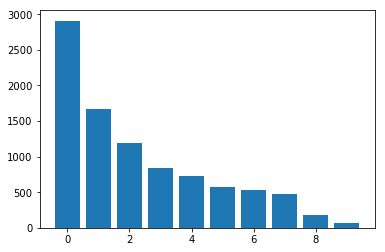

In [48]:
plt.bar(xIndex,all_reason)

In [49]:
# for each airline wise
#do urself

In [51]:
from wordcloud import WordCloud,STOPWORDS

In [53]:
words=''.join(twitter['text'])

In [61]:
wordclouds=WordCloud(stopwords=STOPWORDS,background_color='black').generate(words)

(-0.5, 399.5, 199.5, -0.5)

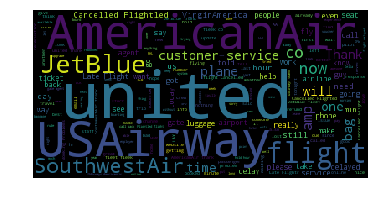

In [63]:
plt.imshow(wordclouds)
plt.axis('off')



In [176]:
import numpy as np

In [177]:
air_name=twitter['airline'].unique()
np.append(air_name,'@')

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American', '@'], dtype=object)

In [178]:
def get_reduced_word(wrd):
    new_word=[]
    for w in wrd.split():
        if w not in air_name:
            new_word.append(w)
        else:
            print(w)
    new_word=''.join(new_word)     
    return new_word

In [179]:
words=get_reduced_word(words)

wordclouds=WordCloud(stopwords=STOPWORDS,background_color='black').generate(words)

(-0.5, 399.5, 199.5, -0.5)

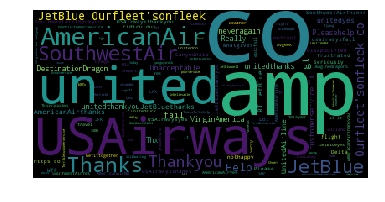

In [180]:
plt.imshow(wordclouds)
plt.axis('off')

In [18]:
twitter['sentiments']=twitter['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [115]:
import nltk
from nltk.corpus import stopwords

In [117]:
stops=set(stopwords.words('english'))
stops.update('')

In [133]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [134]:
lemmatizer = WordNetLemmatizer()

In [135]:
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [144]:
def clean_data(data):
    meaningful_words = []
    for w in data.split():
        if w.lower() not in stops:
            pos = pos_tag([w])
           # print(pos)
         #  if get_simple_tag(pos)
            n_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            meaningful_words.append(n_word.lower())
    return meaningful_words

In [218]:
clean_word=[]
for i in twitter['text']:
    clean_word.append(clean_data(i))
    


KeyboardInterrupt: 

In [ ]:
clean_word

In [5]:
from sklearn.cross_validation import train_test_split

/Users/achintyasarkar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(twitter['text'],twitter['sentiments'] , test_size = 0.2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
count_vect = CountVectorizer(analyzer = "word",ngram_range=(1,2))

In [21]:
train_transformed = count_vect.fit_transform(x_train)
count_vect.

In [29]:
train_transformed.shape

(11712, 99676)

In [30]:
test_features=count_vect.transform(x_test)
test_features

<2928x99676 sparse matrix of type '<class 'numpy.int64'>'
	with 75670 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf=DecisionTreeClassifier()
clf.fit(train_transformed,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
clf.score(test_features,y_test)

0.74726775956284153

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
clf.fit(train_transformed,y_train)
clf.score(test_features,y_test)

0.74590163934426235

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
tfif=TfidfVectorizer(analyzer='word')

In [212]:
train_tra = count_vect.fit_transform(x_train)

In [214]:
test_ftr=count_vect.transform(x_test)

In [216]:
clf=DecisionTreeClassifier()
clf.fit(train_tra,y_train)
clf.score(test_ftr,y_test)


1.0

In [17]:
twitter.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiments
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
